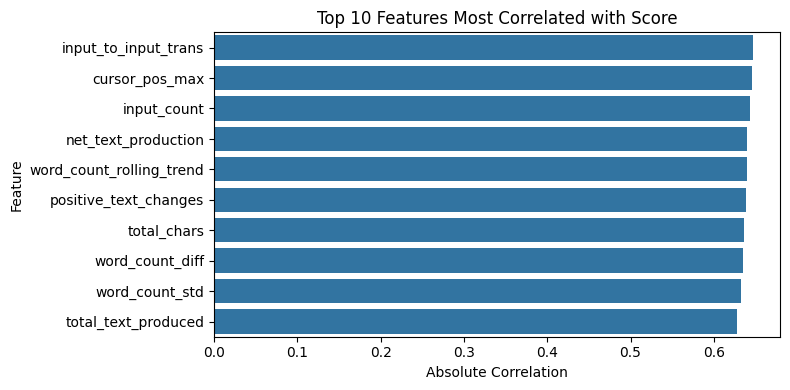

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/train_behaviour_features.csv")
scores = pd.read_csv("../data/train_scores.csv")
df = df.merge(scores, on="id", how="left")

df_num = df.select_dtypes(include=['number'])

corr = df_num.corr()['score'].drop('score')
corr_sorted = corr.abs().sort_values(ascending=False)

top = corr_sorted.head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top, y=top.index)
plt.title(f"Top {len(top)} Features Most Correlated with Score")
plt.xlabel("Absolute Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig("../data_visualization/graph/Top_Features_Most_Correlated_with_Score.png")
plt.show()


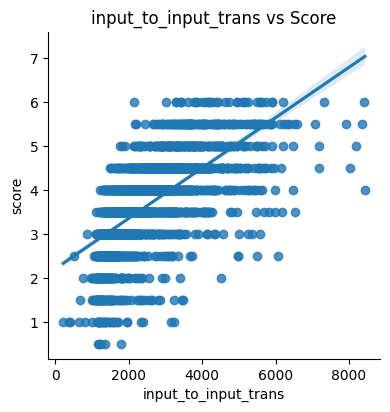

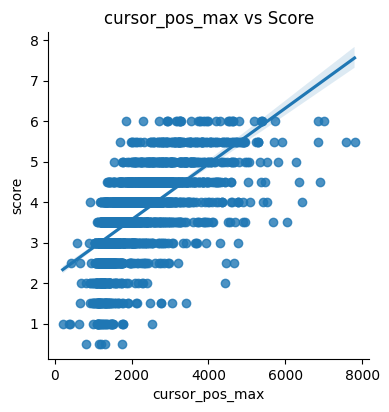

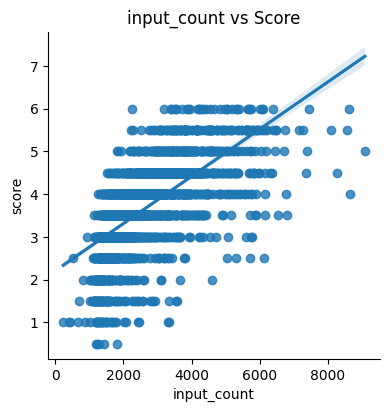

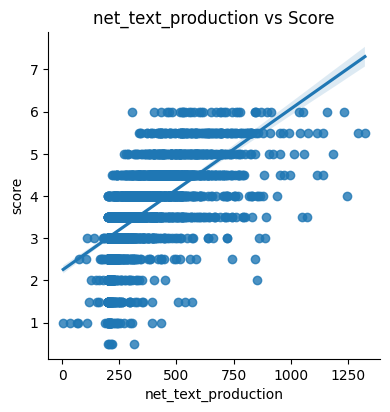

In [21]:
top = corr_sorted.head(4).index.tolist()

for feat in top:
    sns.lmplot(data=df, x=feat, y="score", height=4)
    plt.title(f"{feat} vs Score")
    plt.savefig(f"../data_visualization/graph/{feat}_vs_Score.png", dpi=300, bbox_inches='tight')
    plt.show()


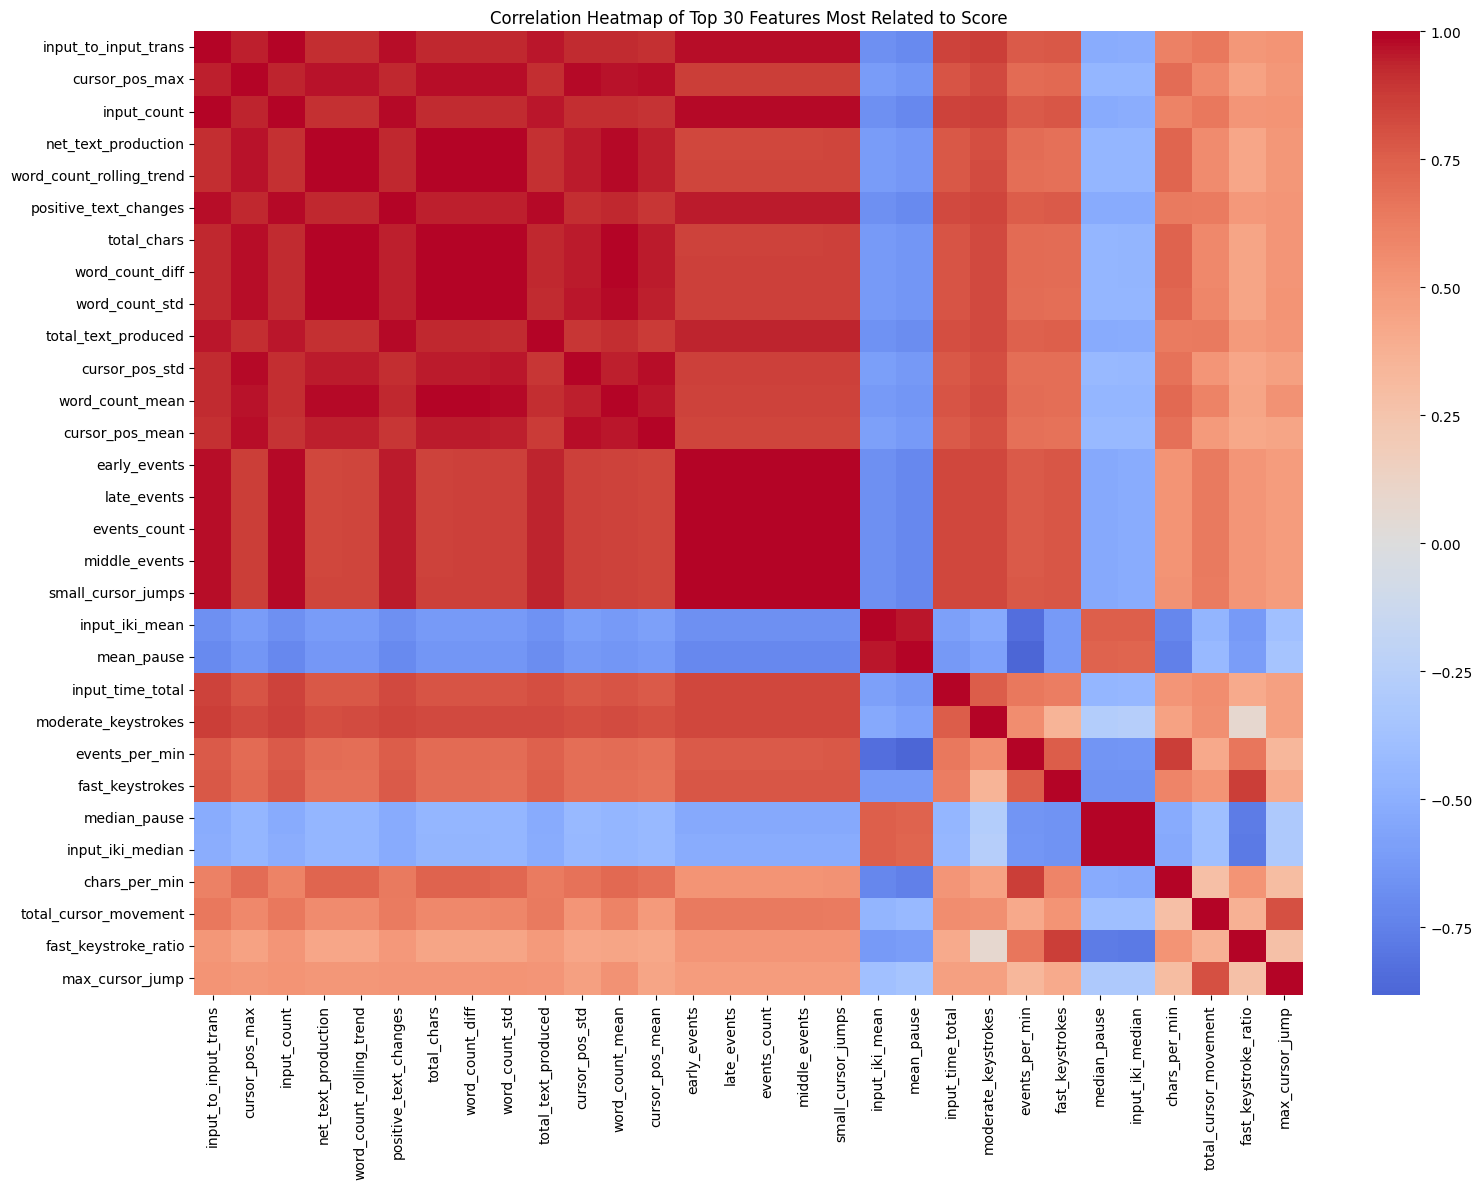

In [25]:
top30 = corr_sorted.head(30).index.tolist()

plt.figure(figsize=(16, 12))
sns.heatmap(df[top30].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Top 30 Features Most Related to Score")

plt.tight_layout()
plt.savefig("../data_visualization/graph/top30_correlation_heatmap.png", 
            dpi=300, bbox_inches="tight")
plt.show()
